In [14]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [55]:
import numpy as np
import pandas as pd
from datetime import datetime , timedelta

# Reflect Tables into SQLAlchemy ORM

In [16]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect,text, desc

In [17]:
# create engine to hawaii.sqlite
# engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:///hawaii.sqlite")

In [18]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [19]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [20]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [21]:
# Create our session (link) from Python to the DB
session = Session(bind = engine)

# Exploratory Precipitation Analysis

In [22]:
# Find the most recent date in the data set.
my_date = session.query(func.max(Measurement.date)).all()
my_date

[('2017-08-23',)]

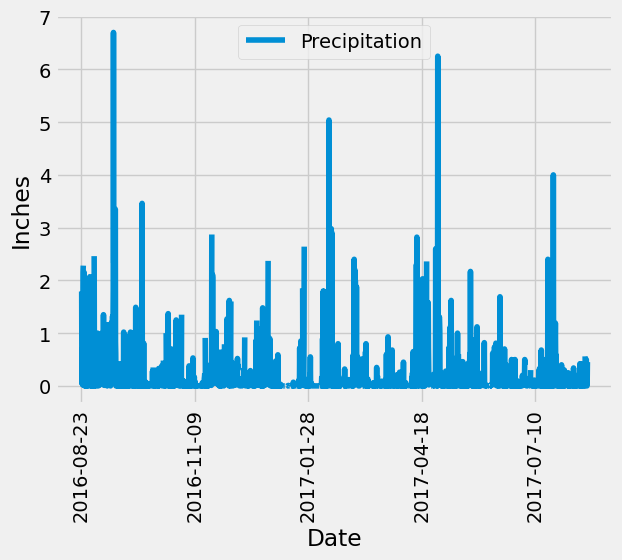

In [60]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Calculate the date one year from the last date in data set.
query_date = datetime.strptime(my_date[0][0], '%Y-%m-%d') - timedelta(days = 366)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > query_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
sorted_prcp_df = prcp_df.sort_values(by = 'Date')

# Use Pandas Plotting with Matplotlib to plot the data
sorted_prcp_df.plot(x = 'Date', y ='Precipitation')
plt.ylabel('Inches')
plt.xlabel('Date')
plt.xticks(rotation = 90)
plt.show()

In [24]:
# Use Pandas to calculate the summary statistics for the precipitation data
df = pd.DataFrame(sorted_prcp_df['Precipitation'].agg(['count','mean', 'std','min', 'median', 'max']))
df

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
median,0.020000
max,6.700000


# Exploratory Station Analysis

In [25]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [38]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station))\
                .group_by(Measurement.station)\
                .order_by(desc(func.count(Measurement.station))).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active_station[0][0]).all()

[(54.0, 85.0, 71.66378066378067)]

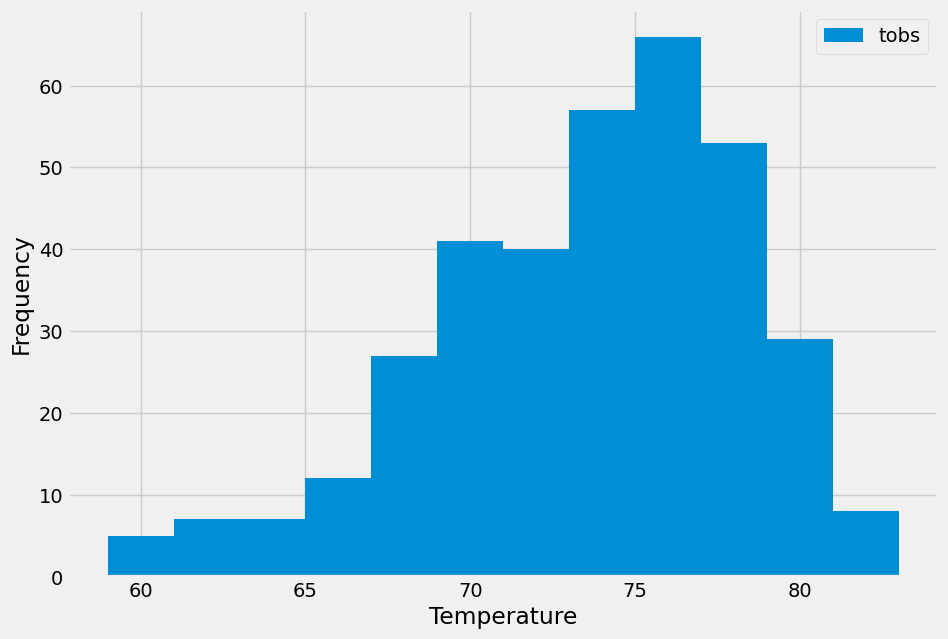

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs, func.count(Measurement.tobs))\
            .filter(Measurement.station == active_station[0][0])\
            .filter(Measurement.date > query_date)\
            .group_by(Measurement.tobs).all()
temp_df = pd.DataFrame(results, columns = ['Temperature', 'Frequency'])

#Plotting the data
plt.figure(figsize=(10,7))
plt.hist(temp_df['Temperature'], bins = 12 , weights=temp_df['Frequency'], label= 'tobs')

#Customize the plot
plt.legend()
plt.xlabel('Temperature')
plt.ylabel('Frequency')

#Show the plot
plt.show()

# Close Session

In [ ]:
# Close Session
session.close()

NameError: name 'session' is not defined